In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data Path

In [24]:
# Epoch-based models
byol = pd.read_csv('/kaggle/input/model-result/byol_ssl_rf_results_all_epochs.csv')
dino = pd.read_csv('/kaggle/input/model-result/dino_ssl_rf_results_all_epochs.csv')
simclr = pd.read_csv('/kaggle/input/model-result/simclr_ssl_rf_results_all_epochs.csv')
moco = pd.read_csv('/kaggle/input/model-result/moco_RF_results_all_epochs.csv')
moco_LR = pd.read_csv('/kaggle/input/model-result/moco_logreg_results.csv')
moco_SVM = pd.read_csv('/kaggle/input/model-result/moco_svm_results.csv')
moco_XgBoost = pd.read_csv('/kaggle/input/model-result/moco_xgboost_results.csv')

# SSL and RF (final results only)
ssl = pd.read_csv('/kaggle/input/model-result/ssl_rf_results_all_epochs.csv')
rf = pd.read_csv('/kaggle/input/model-result/RF_model_results.csv')

Downstream Classifier use as Random Forest

/tmp/ipykernel_36/3946620794.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/3946620794.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/3946620794.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and

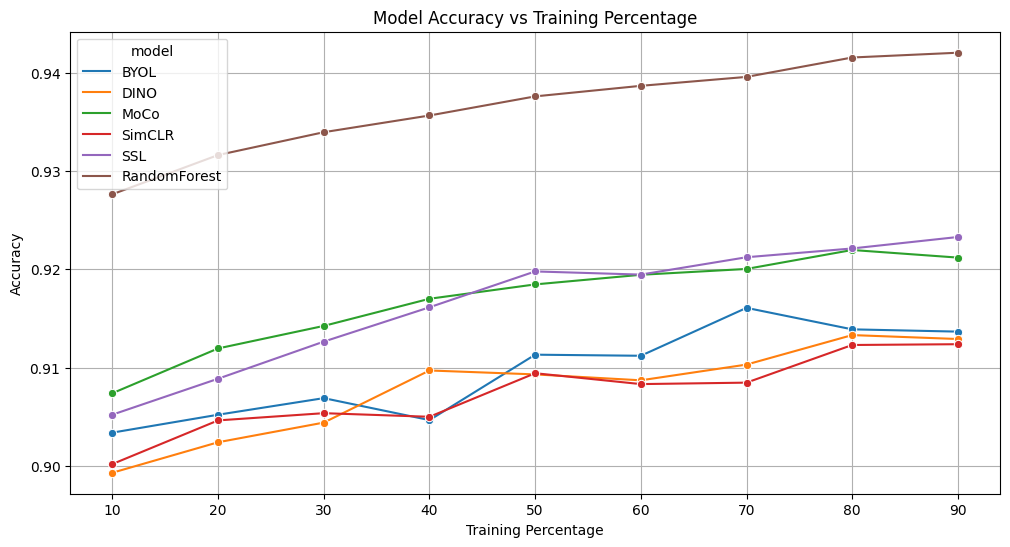

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def extract_best(df, model_name):
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = model_name
    return best[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

byol_best = extract_best(byol, 'BYOL')
dino_best = extract_best(dino, 'DINO')
moco_best = extract_best(moco, 'MoCo')
simclr_best = extract_best(simclr, 'SimCLR')



# SSL
ssl['model'] = 'SSL'
ssl = ssl[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

# RF
rf[['train_pct', 'test_pct']] = rf['Unnamed: 0'].str.split(':', expand=True).astype(int)
rf.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)
rf['model'] = 'RandomForest'
rf = rf[['train_pct', 'test_pct', 'accuracy', 'f1_class_0', 'f1_class_1', 'model']]

all_models = pd.concat([
    byol_best, dino_best, moco_best, simclr_best, ssl, rf
], ignore_index=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title("Model Accuracy vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

F1 Score

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

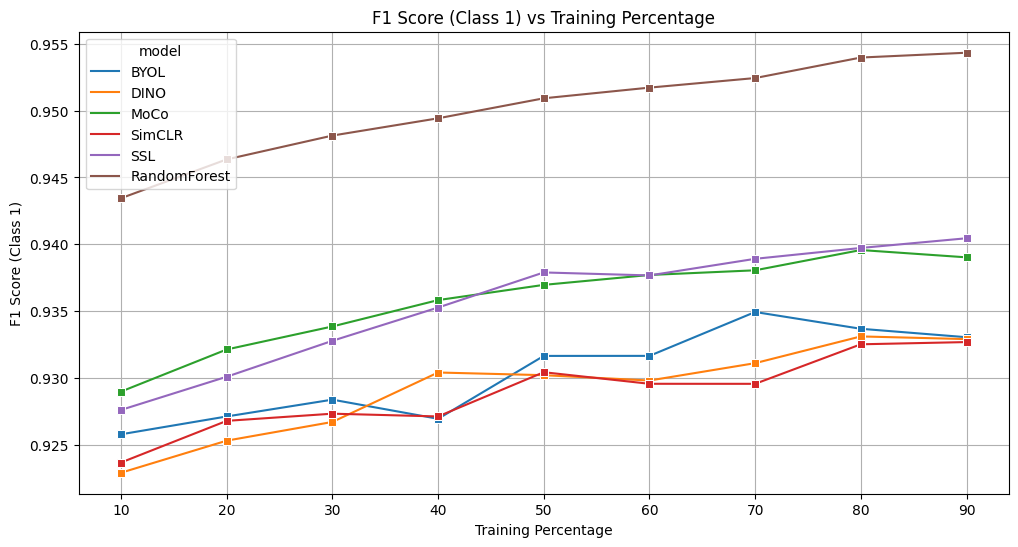

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='f1_class_1', hue='model', marker='s')
plt.title("F1 Score (Class 1) vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("F1 Score (Class 1)")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

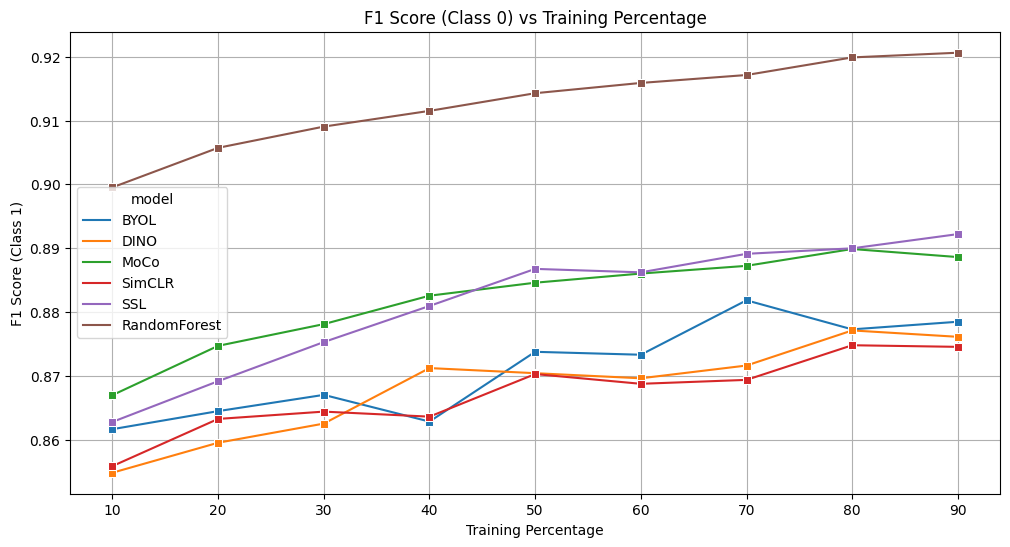

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=all_models, x='train_pct', y='f1_class_0', hue='model', marker='s')
plt.title("F1 Score (Class 0) vs Training Percentage")
plt.xlabel("Training Percentage")
plt.ylabel("F1 Score (Class 1)")
plt.grid(True)
plt.show()

Moco(RF, SVM, LR, XgBoost)

In [28]:
moco_rf = pd.read_csv('/kaggle/input/model-result/moco_RF_results_all_epochs.csv')
moco_lr = pd.read_csv('/kaggle/input/model-result/moco_logreg_results.csv')
moco_svm = pd.read_csv('/kaggle/input/model-result/moco_svm_results.csv')
moco_xgb = pd.read_csv('/kaggle/input/model-result/moco_xgboost_results.csv')

/tmp/ipykernel_36/145721445.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/145721445.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct']).apply(
/tmp/ipykernel_36/145721445.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

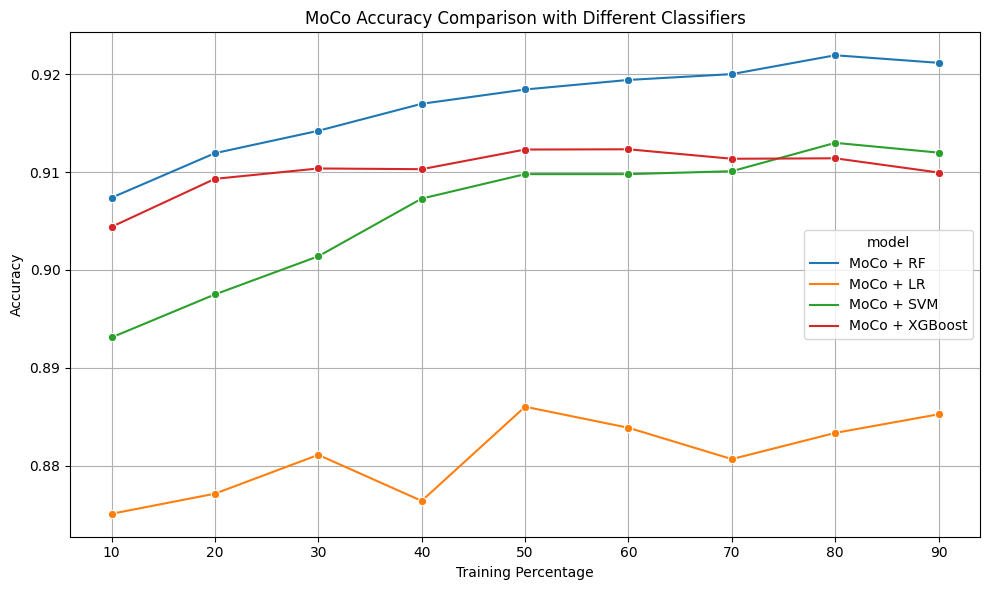

In [29]:
# Function to extract best accuracy per train-test split
def extract_moco_best(df, name):
    best = df.groupby(['train_pct', 'test_pct']).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = name
    return best[['train_pct', 'test_pct', 'accuracy', 'model']]

# Extract best accuracy for each classifier
rf_best = extract_moco_best(moco_rf, 'MoCo + RF')
lr_best = extract_moco_best(moco_lr, 'MoCo + LR')
svm_best = extract_moco_best(moco_svm, 'MoCo + SVM')
xgb_best = extract_moco_best(moco_xgb, 'MoCo + XGBoost')

# Combine
moco_all = pd.concat([rf_best, lr_best, svm_best, xgb_best], ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=moco_all, x='train_pct', y='accuracy', hue='model', marker='o')
plt.title('MoCo Accuracy Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart: Best Accuracy by Train-Test Split

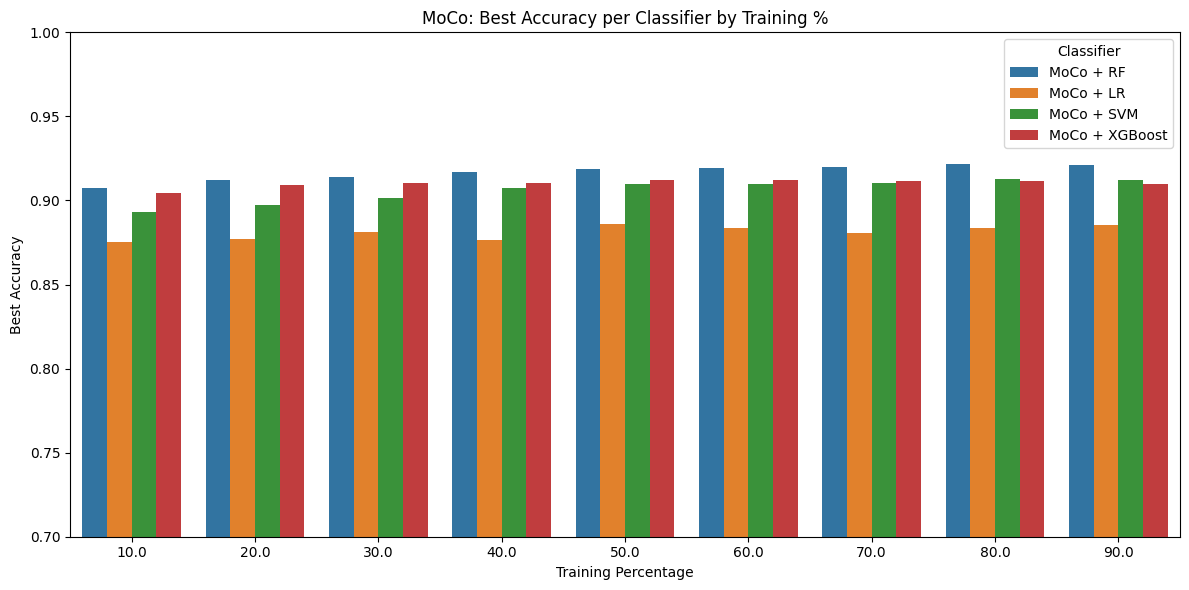

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=moco_all, x='train_pct', y='accuracy', hue='model')
plt.title("MoCo: Best Accuracy per Classifier by Training %")
plt.xlabel("Training Percentage")
plt.ylabel("Best Accuracy")
plt.ylim(0.7, 1)  # << Limit Y-axis from 0.7 to 1
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()

Histogram: Accuracy Distribution per Classifier

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

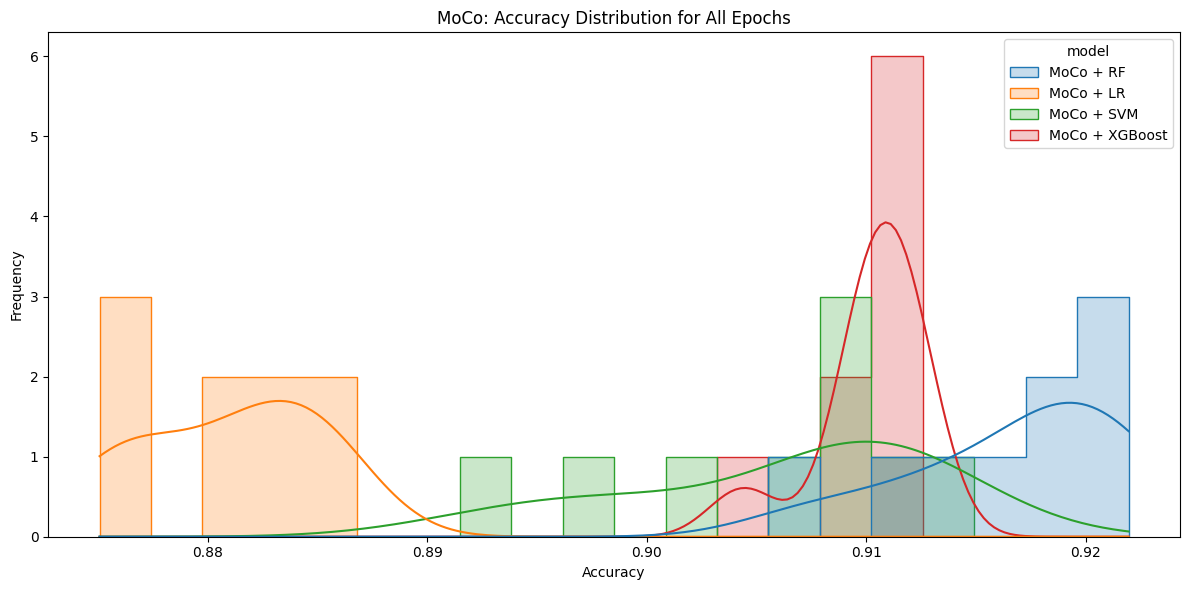

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=moco_all, x='accuracy', hue='model', bins=20, kde=True, element='step')
plt.title("MoCo: Accuracy Distribution for All Epochs")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

HeatMap

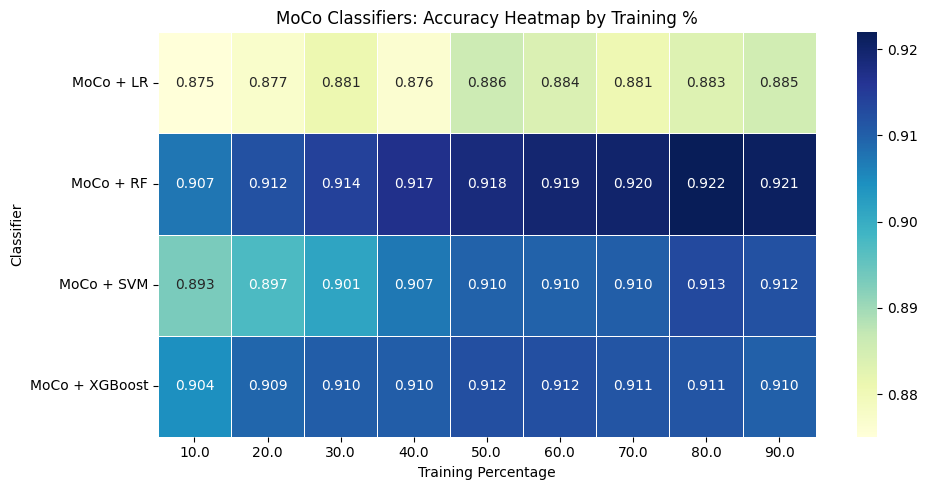

In [32]:
# Pivot table
pivot = moco_all.pivot_table(index='model', columns='train_pct', values='accuracy')

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5)
plt.title("MoCo Classifiers: Accuracy Heatmap by Training %")
plt.xlabel("Training Percentage")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()

 Bar Chart of Average Accuracy

            model  avg_accuracy
0       MoCo + LR      0.880979
1       MoCo + RF      0.916846
2      MoCo + SVM      0.906000
3  MoCo + XGBoost      0.910203


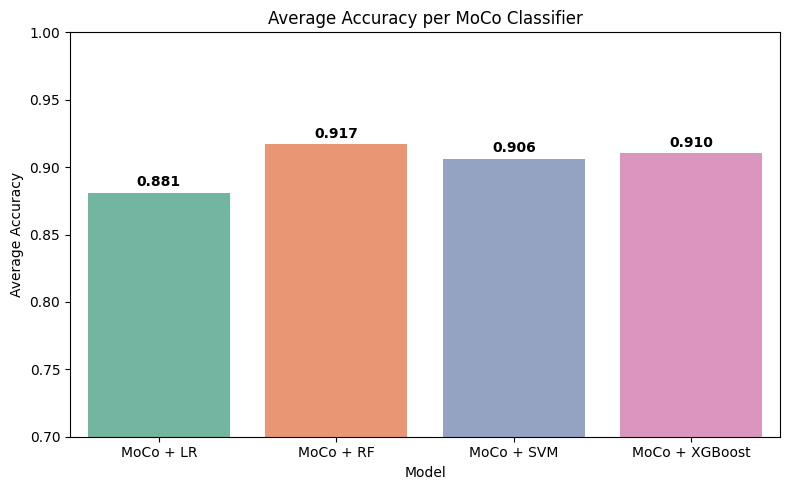

In [33]:
# Compute average accuracy for each model
avg_accuracy = moco_all.groupby('model')['accuracy'].mean().reset_index()
avg_accuracy.rename(columns={'accuracy': 'avg_accuracy'}, inplace=True)
print(avg_accuracy)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_accuracy, x='model', y='avg_accuracy', palette='Set2')
plt.ylim(0.7, 1)
plt.title('Average Accuracy per MoCo Classifier')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')

# Add accuracy values on top of bars
for index, row in avg_accuracy.iterrows():
    plt.text(index, row['avg_accuracy'] + 0.005, f"{row['avg_accuracy']:.3f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

SimCLR(RF,SVM,XgBoost,LR)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load SimCLR classifier results
simclr_rf = pd.read_csv('/kaggle/input/sim-clr-result/simclr_ssl_rf_results_all_epochs.csv')
simclr_lr = pd.read_csv('/kaggle/input/sim-clr-result/simclr_linear_unsw_results.csv')
simclr_svm = pd.read_csv('/kaggle/input/sim-clr-result/sim_clr_svm_results.csv')
simclr_xgb = pd.read_csv('/kaggle/input/sim-clr-result/simclr_xgboost_unsw_results.csv')

In [14]:
# Standardize column names for LR and XGB
for df in [simclr_lr, simclr_xgb]:
    df.rename(columns={'train_ratio': 'train_pct'}, inplace=True)
    df['test_pct'] = 100 - df['train_pct']
    df['epoch'] = 0  # if missing, just fill with dummy
    df['model'] = 'temp'  # will be overwritten
    if 'f1_class_0' not in df.columns:
        df['f1_class_0'] = None
    if 'f1_class_1' not in df.columns:
        df['f1_class_1'] = None

# Fix column names for SVM
simclr_svm.rename(columns={'f1_0': 'f1_class_0', 'f1_1': 'f1_class_1'}, inplace=True)

In [15]:
def extract_best(df, name):
    best = df.groupby(['train_pct', 'test_pct'], group_keys=False).apply(
        lambda g: g.loc[g['accuracy'].idxmax()]
    ).reset_index(drop=True)
    best['model'] = name
    return best[['train_pct', 'test_pct', 'accuracy', 'model']]

/tmp/ipykernel_36/3413720304.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct'], group_keys=False).apply(
/tmp/ipykernel_36/3413720304.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best = df.groupby(['train_pct', 'test_pct'], group_keys=False).apply(
/tmp/ipykernel_36/3413720304.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping colum

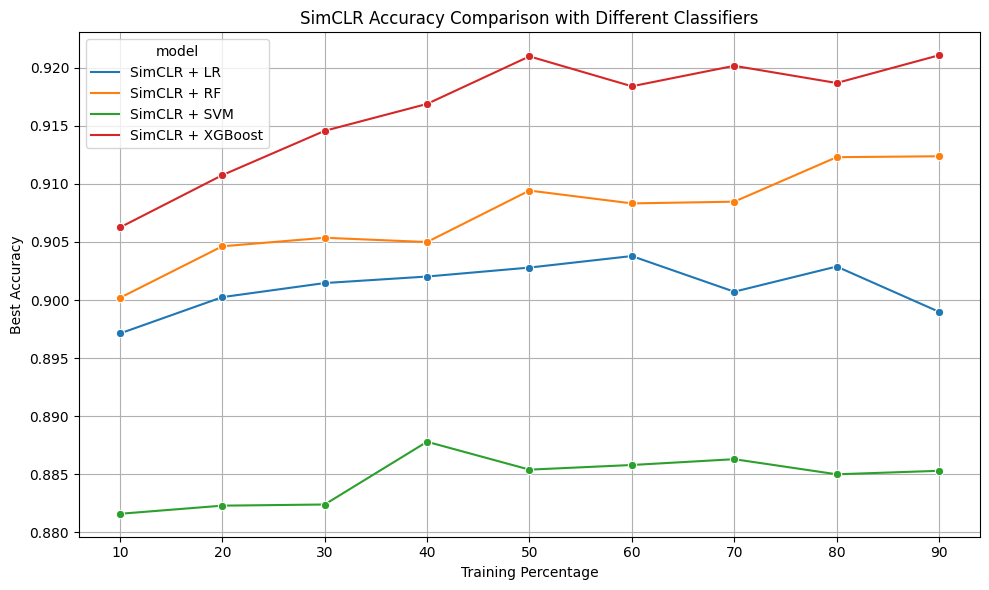

In [18]:
# Apply after fixes
rf_best = extract_best(simclr_rf, 'SimCLR + RF')
lr_best = extract_best(simclr_lr, 'SimCLR + LR')
svm_best = extract_best(simclr_svm, 'SimCLR + SVM')
xgb_best = extract_best(simclr_xgb, 'SimCLR + XGBoost')

# Combine and plot
simclr_all = pd.concat([rf_best, lr_best, svm_best, xgb_best], ignore_index=True)
simclr_all.sort_values(by=['model', 'train_pct'], inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Use the final cleaned & combined simclr_all from earlier
# (contains train_pct, accuracy, and model for RF, LR, SVM, XGBoost)

plt.figure(figsize=(10, 6))
sns.lineplot(data=simclr_all, x='train_pct', y='accuracy', hue='model', marker='o')

plt.title('SimCLR Accuracy Comparison with Different Classifiers')
plt.xlabel('Training Percentage')
plt.ylabel('Best Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart: Best Accuracy by Train-Test Split

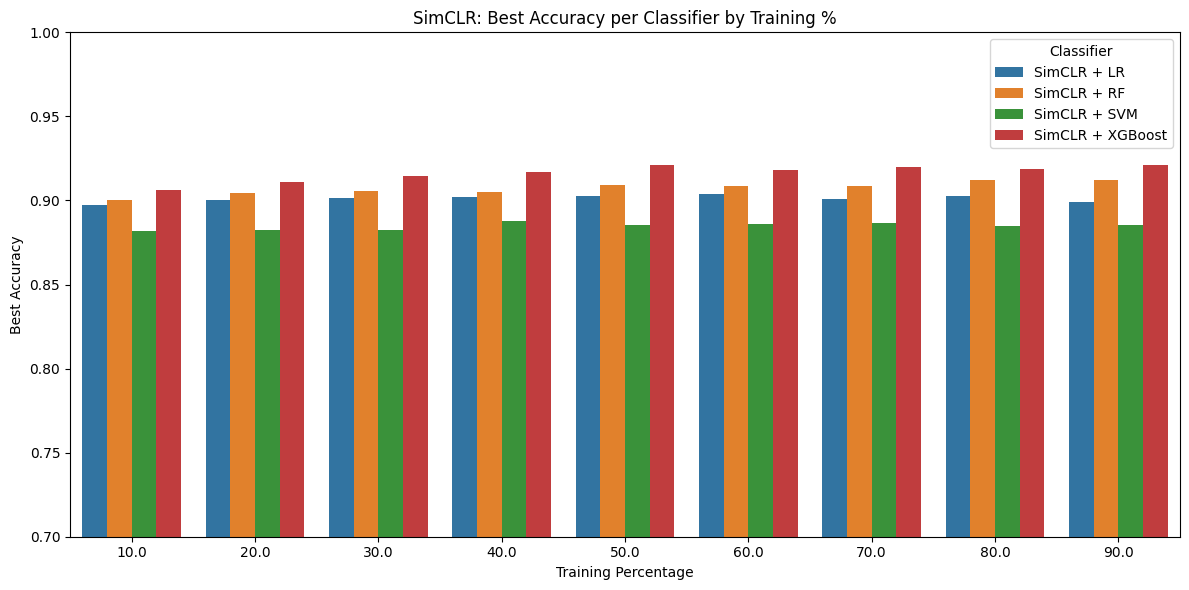

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=simclr_all, x='train_pct', y='accuracy', hue='model')

plt.title("SimCLR: Best Accuracy per Classifier by Training %")
plt.xlabel("Training Percentage")
plt.ylabel("Best Accuracy")
plt.ylim(0.7, 1)  # Zoom into meaningful accuracy range
plt.legend(title='Classifier')
plt.tight_layout()
plt.show()

Histogram: Accuracy Distribution per Classifier

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

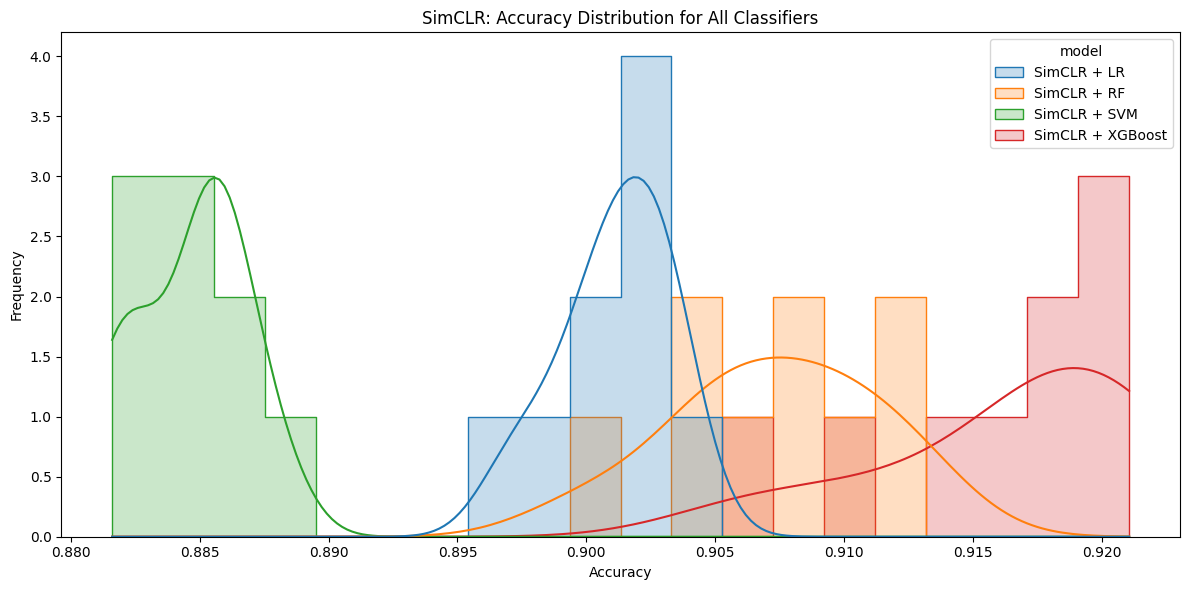

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data=simclr_all, x='accuracy', hue='model', bins=20, kde=True, element='step')

plt.title("SimCLR: Accuracy Distribution for All Classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

HeatMap

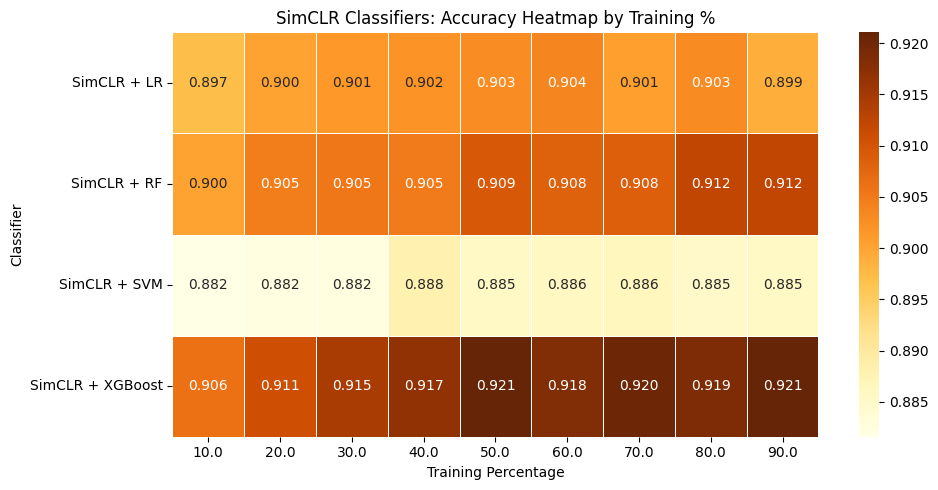

In [21]:
# Pivot table
pivot_simclr = simclr_all.pivot_table(index='model', columns='train_pct', values='accuracy')

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_simclr, annot=True, fmt=".3f", cmap="YlOrBr", linewidths=0.5)

plt.title("SimCLR Classifiers: Accuracy Heatmap by Training %")
plt.xlabel("Training Percentage")
plt.ylabel("Classifier")
plt.tight_layout()
plt.show()

Bar Chart of Average Accuracy

              model  avg_accuracy
0       SimCLR + LR      0.901111
1       SimCLR + RF      0.907335
2      SimCLR + SVM      0.884656
3  SimCLR + XGBoost      0.916410


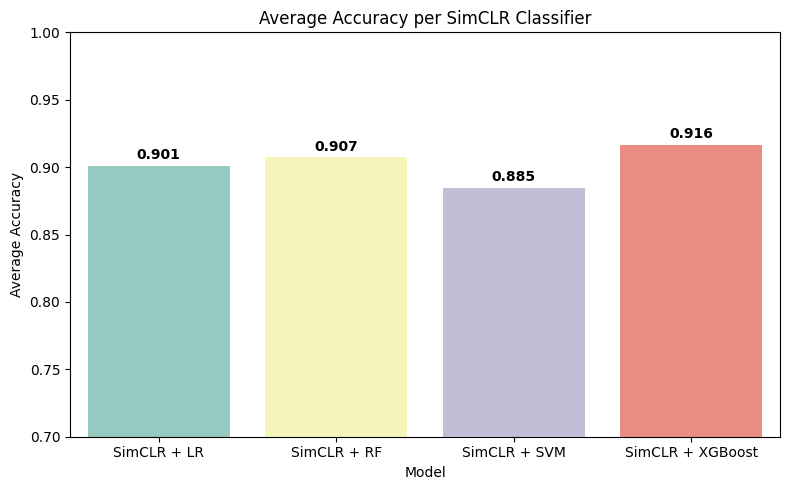

In [22]:
# Compute average accuracy for each SimCLR model
avg_accuracy_simclr = simclr_all.groupby('model')['accuracy'].mean().reset_index()
avg_accuracy_simclr.rename(columns={'accuracy': 'avg_accuracy'}, inplace=True)
print(avg_accuracy_simclr)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_accuracy_simclr, x='model', y='avg_accuracy', palette='Set3')
plt.ylim(0.7, 1)
plt.title('Average Accuracy per SimCLR Classifier')
plt.xlabel('Model')
plt.ylabel('Average Accuracy')

# Add accuracy values on top of bars
for index, row in avg_accuracy_simclr.iterrows():
    plt.text(index, row['avg_accuracy'] + 0.005, f"{row['avg_accuracy']:.3f}", 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Combine MoCo & SimCLR Average Accuracy

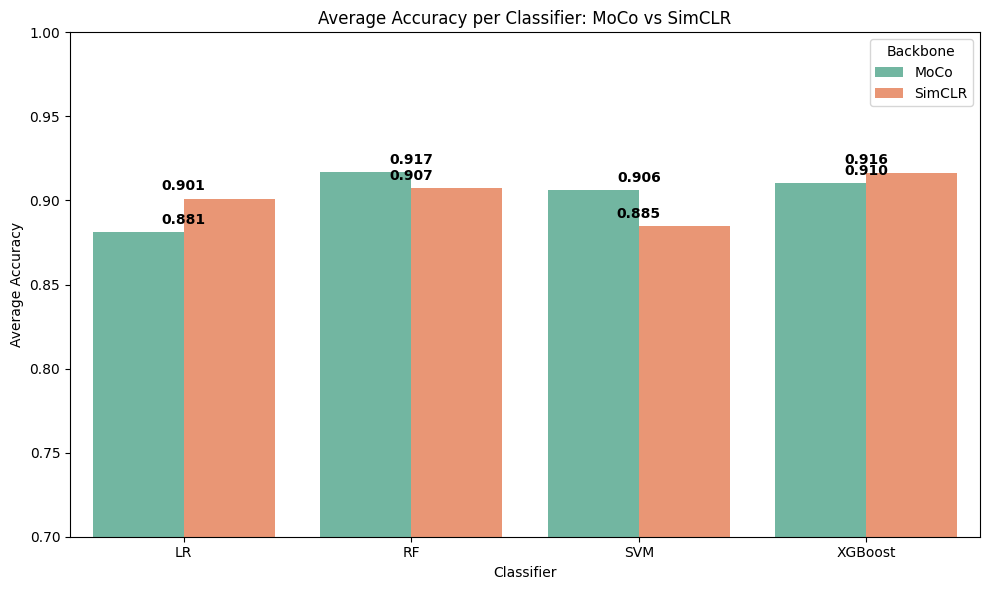

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute average accuracy for MoCo
avg_moco = moco_all.groupby('model')['accuracy'].mean().reset_index()
avg_moco['backbone'] = 'MoCo'
avg_moco.rename(columns={'accuracy': 'avg_accuracy'}, inplace=True)

# Step 2: Compute average accuracy for SimCLR
avg_simclr = simclr_all.groupby('model')['accuracy'].mean().reset_index()
avg_simclr['backbone'] = 'SimCLR'
avg_simclr.rename(columns={'accuracy': 'avg_accuracy'}, inplace=True)

# Step 3: Normalize model names (remove "MoCo +", "SimCLR +")
avg_moco['classifier'] = avg_moco['model'].str.replace('MoCo + ', '', regex=False)
avg_simclr['classifier'] = avg_simclr['model'].str.replace('SimCLR + ', '', regex=False)

# Step 4: Combine into one DataFrame
combined_avg = pd.concat([avg_moco, avg_simclr], ignore_index=True)

# Step 5: Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_avg, x='classifier', y='avg_accuracy', hue='backbone', palette='Set2')
plt.title('Average Accuracy per Classifier: MoCo vs SimCLR')
plt.xlabel('Classifier')
plt.ylabel('Average Accuracy')
plt.ylim(0.7, 1)

# Add value labels
for i, row in combined_avg.iterrows():
    plt.text(
        x=i % len(avg_moco), 
        y=row['avg_accuracy'] + 0.005,
        s=f"{row['avg_accuracy']:.3f}", 
        ha='center', 
        fontweight='bold'
    )

plt.legend(title='Backbone')
plt.tight_layout()
plt.show()


Classifier Accuracy by Training Percentage: MoCo vs SimCLR

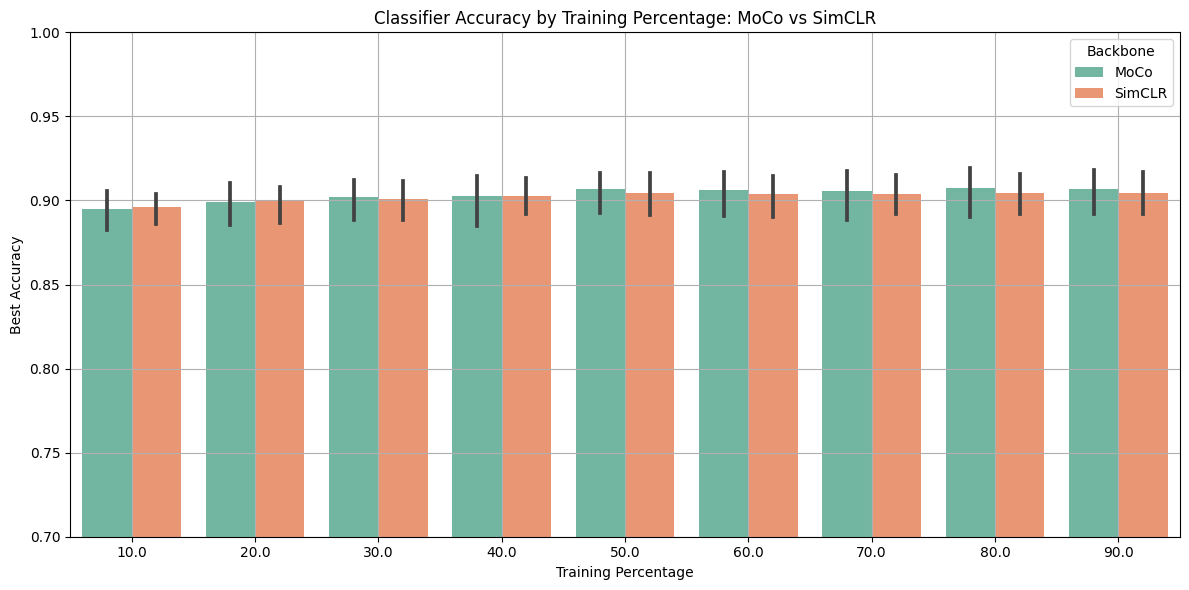

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean model names
moco_all['backbone'] = 'MoCo'
simclr_all['backbone'] = 'SimCLR'

moco_all['classifier'] = moco_all['model'].str.replace('MoCo + ', '', regex=False)
simclr_all['classifier'] = simclr_all['model'].str.replace('SimCLR + ', '', regex=False)

# Step 2: Combine MoCo and SimCLR
combined = pd.concat([moco_all, simclr_all], ignore_index=True)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined, 
    x='train_pct', 
    y='accuracy', 
    hue='backbone', 
    palette='Set2', 
    dodge=True
)

plt.title('Classifier Accuracy by Training Percentage: MoCo vs SimCLR')
plt.xlabel('Training Percentage')
plt.ylabel('Best Accuracy')
plt.ylim(0.7, 1)
plt.grid(True)
plt.legend(title='Backbone')
plt.tight_layout()
plt.show()

Line Chart Comparing All Classifiers for MoCo & SimCLR

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

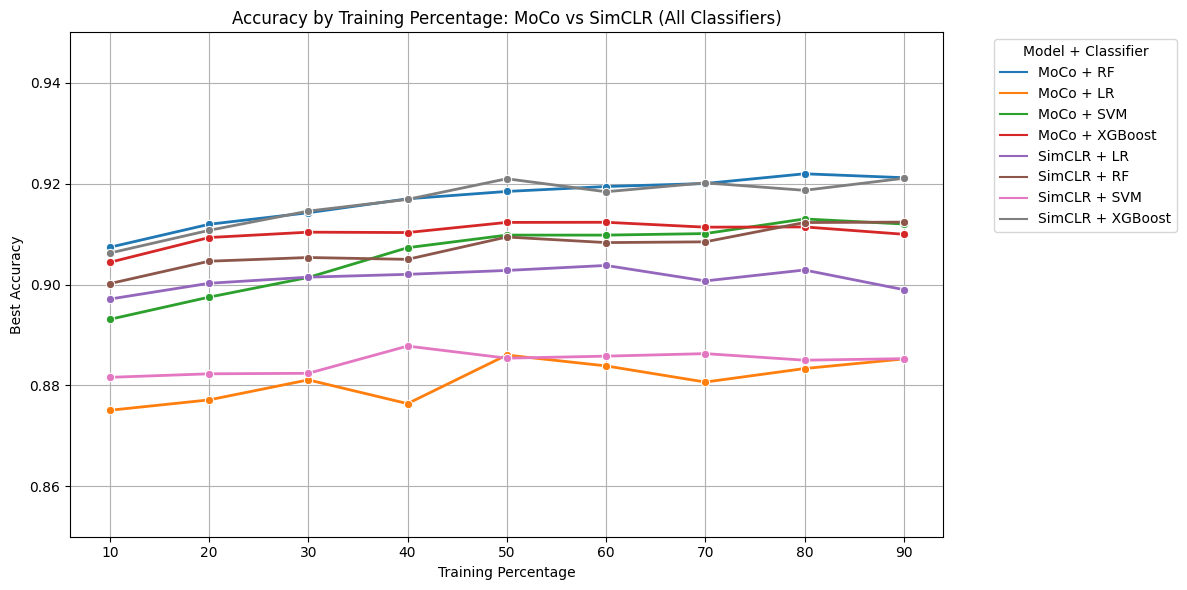

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add backbone and classifier columns (if not already)
moco_all['backbone'] = 'MoCo'
simclr_all['backbone'] = 'SimCLR'

moco_all['classifier'] = moco_all['model'].str.replace('MoCo + ', '', regex=False)
simclr_all['classifier'] = simclr_all['model'].str.replace('SimCLR + ', '', regex=False)

# Step 2: Combine datasets
combined = pd.concat([moco_all, simclr_all], ignore_index=True)

# Step 3: Create a new column that combines backbone + classifier
combined['model_combo'] = combined['backbone'] + ' + ' + combined['classifier']

# Step 4: Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=combined,
    x='train_pct',
    y='accuracy',
    hue='model_combo',
    marker='o',
    linewidth=2,
    palette='tab10'
)

# Decorate
plt.title("Accuracy by Training Percentage: MoCo vs SimCLR (All Classifiers)")
plt.xlabel("Training Percentage")
plt.ylabel("Best Accuracy")
plt.ylim(0.85, 0.95)
plt.grid(True)
plt.legend(title='Model + Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
